<a href="https://colab.research.google.com/github/tarabelo/PIAC-apuntes/blob/main/Tema%202%3A%20Algoritmos%20cu%C3%A1nticos%20%22cl%C3%A1sicos%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalamos qiskit en el notebook
!pip install qiskit qiskit-aer pylatexenc

In [2]:
import numpy as np
from math import sqrt

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
# import basic plot tools
from qiskit.visualization import plot_histogram

# Funciones auxiliares

# Función para simular y mostrar el vector de estado
def obten_estado(qcirc, etiqueta="|\psi\!\!> = ", bloch=False):
    # Usamos el simulador de vector de estado
    # https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html
    sim = AerSimulator(method='statevector')
    qc_obj = transpile(qcirc, sim)
    result = sim.run(qc_obj).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    if bloch:
      display(estado.draw('bloch'))

# Funcion para obtener y mostrar la matriz unitaria
def obten_unitaria(qcirc, etiqueta):
    # Usamos el simulador de matriz unitaria
    sim_u = AerSimulator(method='unitary')
    qc_obj = transpile(qcirc, sim_u)
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    display(unitary.draw('latex', prefix=etiqueta))

In [ ]:
# Oráculos creados en el apartado anterior
# Oráculo para f0
def f0_oraculo():
    """
    Define un oraculo para la funcion f0
        return: circuito de 2 cúbit en forma de puerta
    """
    x = QuantumRegister(1, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)

    # Aplica CNOT, primer parámetro target, segundo control
    qc.cx(x,y)


    oraculo = qc.to_gate()
    oraculo.name = "$U_{f_0}$"
    return(oraculo)

# Oráculo para f1
def f1_oraculo():
    """
    Define un oraculo para la funcion f1
        return: circuito de 2 cúbit en forma de puerta
    """
    x = QuantumRegister(1, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)

    # Invierte el cúbit x
    qc.x(x)
    # Aplica CNOT, primer parámetro control, segundo target
    qc.cx(x,y)
    # recupera el cúbit x
    qc.x(x)

    oraculo = qc.to_gate()
    oraculo.name = "$U_{f_1}$"
    return(oraculo)

# Oráculo para f2
def f2_oraculo():
    """
    Define un oraculo para la funcion f2
        return: circuito de 2 cúbit en forma de puerta
    """
    x = QuantumRegister(1, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)

    # Función identidad

    oraculo = qc.to_gate()
    oraculo.name = "$U_{f_2}$"
    return(oraculo)

# Oráculo para f3
def f3_oraculo():
    """
    Define un oraculo para la funcion f3
        return: circuito de 2 cúbit en forma de puerta
    """
    x = QuantumRegister(1, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)

    # Invierte el cúbit y
    qc.x(y)

    oraculo = qc.to_gate()
    oraculo.name = "$U_{f_3}$"
    return(oraculo)

# Algoritmos cuánticos "clásicos"

Algoritmos que presentan una ventaja real sobre sus homólogos clásicos.

Algunas características:
 - Introducidos en los años 90 del siglo XX
 - Suponen que tenemos computadores cuánticos ideales
 - Algunos de ellos carecen de utilidad práctica, mientras que otros suelen formar parte de algoritmos más complejos.

### Contenidos

1. [Algoritmo de Deutsch](#deutsch)
3. [Algoritmo de Deutsch-Jozsa](#dj)
4. [Algoritmo de Bernstein-Vazirani](#bv)
4. [Algoritmo de periodicidad de Simon](#simon)


-------------------------------
-------------------------------
-------------------------------

# Algoritmo de Deutsch <a name="deutsch"></a>

Las funciones $f(x): \{0,1\}\rightarrow\{0,1\}$ se denominan:

- Constantes: si $f(0)=f(1)$
- Balanceadas: si $f(0)\ne f(1)$

De las 4 funciones anteriores, $f_0$ y $f_1$ son balanceadas mientras que $f_2$ y $f_3$ son constantes.

Dada una función $f(x): \{0,1\}\rightarrow\{0,1\}$ desconocida, un algoritmo clásico necesita 2 llamadas a $f$ para determinar si es constante o balanceada.

El **algoritmo cuántico de Deutsch** puede determinarlo con una sola llamada a $f$.

Partimos del circuito siguiente:

<center><img src="https://drive.google.com/uc?export=view&id=1npbfKEwOqZA1EOUl8JeoytuQ7e0b7v1C" alt="Deutsch" width="800"  /></center>

Estado después de la puerta X:
$$
|\psi_0\rangle = |10\rangle
$$

Estado despues de las H:
$$
|\psi_1\rangle = |-+\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}\otimes \frac{|0\rangle + |1\rangle}{\sqrt{2}} = |y\rangle \otimes|x\rangle
$$

Y se tiene que:

$$
|y\oplus f(x)\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}\oplus f(x) = \frac{|0\oplus f(x)\rangle - |1\oplus f(x)\rangle}{\sqrt{2}} =
\begin{cases}
\frac{|0\rangle - |1\rangle}{\sqrt{2}}, & \text{si } f(x) = 0\\
\frac{|1\rangle - |0\rangle}{\sqrt{2}}, & \text{si } f(x) = 1
\end{cases}
$$

por lo que podemos escribir:
$$
|y\oplus f(x)\rangle = (-1)^{f(x)}\frac{|0\rangle - |1\rangle}{\sqrt{2}}
$$

De aquí se tiene que:

$$
|\psi_2\rangle = \frac{1}{\sqrt{2}}(-1)^{f(x)} (|0\rangle - |1\rangle)\otimes |x\rangle =
\frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)\otimes (-1)^{f(x)}|x\rangle
$$
Y podemos escribir:
$$
(-1)^{f(x)}|x\rangle = |(-1)^{f(x)}x\rangle =
\frac{(-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle}{\sqrt{2}}
$$

Por lo tanto, el estado $|\psi_2\rangle$ queda:
$$
|\psi_2\rangle =
\frac{|0\rangle - |1\rangle}{\sqrt{2}}\otimes
\frac{(-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle}{\sqrt{2}} =
\begin{cases}
\pm\left[\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right] \otimes \left[\frac{|0\rangle + |1\rangle}{\sqrt{2}}\right], & \text{si } f(0) = f(1)\\\mbox{}\\
\pm\left[\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right] \otimes  \left[\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right], & \text{si } f(0) \neq f(1)
\end{cases}
$$

Al aplicar la última `H`:

$$
|\psi_3\rangle =
\begin{cases}
\pm\frac{|0\rangle - |1\rangle}{\sqrt{2}} \otimes |0\rangle, & \text{si } f(0) = f(1)\\\mbox{}\\
\pm\frac{|0\rangle - |1\rangle}{\sqrt{2}} \otimes |1\rangle, & \text{si } f(0) \neq f(1)
\end{cases}
$$

Midiendo el cúbit de arriba vamos a obtener, con total certeza, un $0$ si $f(0)=f(1)$ o un $1$ si $f(0)\ne f(1)$, con una sola evaluacion de $f(x)$.


### Ejercicio 3

Implementa un circuito en Qiskit para probar el algoritmo de Deutsch con los oráculos definidos para las funciones $f_{0-3}$. Comprueba que es capaz de determinar si la función es constante o balanceada.

In [ ]:
# Empieza creando un circuito a partir de un oráculo con un bit de medida
def deutsch_qc(oraculo):
    x = QuantumRegister(1, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    meas = ClassicalRegister(1, name="Medida")
    qc = QuantumCircuit(x,y,meas)

    # TODO: Añade las puertas iniciales


    # TODO: Añade el oraculo
    qc = qc.compose()

    # TODO: Añade la última puerta H

    # TODO: Añade la medida

    # Devuelve el circuito
    return qc

In [ ]:
# Probamos con f0
qc = deutsch_qc(f0_oraculo)
qc.draw('mpl')

In [ ]:
# Hacemos la simulacion
sim = AerSimulator(method='automatic')
qc_obj = transpile(qc, sim)
result = sim.run(qc_obj, shots=1024).result()
plot_histogram(result.get_counts())

In [ ]:
# TODO: Probar con las otras 3 funciones
sim = AerSimulator(method='automatic')
for f in [f1_oraculo, f2_oraculo, f3_oraculo]:
    qc = deutsch_qc(f)
    # hacemos la simulacion
    qc_obj = transpile(qc, sim)
    result = sim.run(qc_obj, shots=1024).result()
    display(plot_histogram(result.get_counts()))



---



---



---



# Algoritmo de Deutsch-Jozsa <a name="dj"></a>

Es una generalización a $n$ bits del anterior. Dada una función (oráculo) $f(\{x_{n-1},x_{n-2},\ldots,x_1,x_{0}\}) \rightarrow \{0,1\}$, que es, o bien, _balanceada_, o bien, _constante_, determinar el tipo:

- Función constante: la salida de $f(x)$ es, o bien, 0, o bien, 1 $\forall x$
- Función balanceada: devuelve 0 para la mitad de las entradas y 1 para la otra mitad

**Solución clásica**

Un algoritmo clásico necesita efectuar en el mejor caso $2$ y en el peor $2^{n-1}+1$ evaluaciones de $f(x)$, por lo que su complejidad es exponencial $\mathcal{O}(2^n)$.

**Solución cuántica**

El algoritmo cuántico ([D. Deutsch and R. Jozsa, 1992](https://doi.org/10.1098%2Frspa.1992.0167)) solo necesita una evaluación del oráculo $f(x)$ (ganancia exponencial).

El circuito usado es:

<center><img src="https://drive.google.com/uc?export=view&id=1SRf5wmYaN4NmLgjT7MXm0v4XsUEIASQW" alt="Deutsch-Jozsa" width="800"  /></center>

Pasos:

<ol>
<li>
Estado inicial:
        

$$\vert \psi_0 \rangle = \vert 1\rangle \vert0\rangle^{\otimes n} $$
</li>
    
<li>
Después de aplicar las primeras puertas H:
$$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \left(|0\rangle - |1 \rangle \right)\vert x\rangle $$
</li>
<p>
<li>
Aplicamos $U_f$ a $\vert y\rangle \vert x\rangle$ para obtener $\vert y \oplus f(x)\rangle\vert x\rangle$, recordando que $y\oplus f(x) = \tfrac{1}{\sqrt{2}} (-1)^{f(x)}(|0\rangle - |1\rangle)$:

$$\vert\psi_2\rangle  = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}(|0\rangle - |1\rangle)|x\rangle=\frac{(|0\rangle - |1\rangle)}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle$$
          </li>
<p>
<li>Ahora aplicamos una H a cada cúbit en  $|x\rangle$ (recordemos que $H^{\otimes n}|x\rangle = \tfrac{1}{\sqrt{2^n}} \sum_{i=0}^{2^n-1} (-1)^{x\cdot i}|i\rangle)$. Si ya no consideramos el cúbit de abajo, el estado es:<p>
$$
\begin{aligned}
    \lvert \psi_3 \rangle
        & = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
            \left[ \sum_{i=0}^{2^n-1}(-1)^{x \cdot i}
            \vert i \rangle \right] \\
        & = \frac{1}{2^n}\sum_{i=0}^{2^n-1}
            \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)}(-1)^{x \cdot i} \right]
            \vert i \rangle
\end{aligned}
$$
       
con $x \cdot i = x_{n-1}i_{n-1}\oplus x_{n-2}i_{n-2}\oplus \ldots \oplus x_1i_1 \oplus x_0i_0$.
   </li>

   <li>Se realiza la medida. La probabilidad de obtener todo 0 ($\vert i \rangle=  \vert 0 \rangle ^{\otimes n}$) es:
$$
       \left| \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \right|^2 =
       \begin{cases}
       1, \text{si } f \text{ es constante}\\
       0, \text{si } f \text{ es balanceada}
       \end{cases}
$$
   </li>
<p>
</ol>
En conclusión, si a la salida obtenemos todo 0, $f$ es constante. Si obtenemos cualquier otro valor $f$ es balanceada.

<p></p>





<details>
    <summary><strong>Demostración de que $H^{\otimes n}|x\rangle = \tfrac{1}{\sqrt{2^n}} \sum_{i=0}^{2^n-1} (-1)^{x\cdot i}|i\rangle$</strong></summary>

El uso de puertas `H` permite poner los n-cúbits en un estado de superposición.

El estado de _superposición completa_ es:

$$
|+\rangle^{\otimes n} = H^{\otimes n}|0\rangle^{\otimes n}
$$

$H^{\otimes n}$ se conoce como puerta _Walsh-Hadamard_.

Ejemplo para 4 cúbits:

$$
H^{\otimes 4}|1010\rangle = H|1\rangle\otimes H|0\rangle\otimes H|1\rangle\otimes H|0\rangle = \\
\frac{1}{4}\left[(|0\rangle - |1\rangle)\otimes (|0\rangle + |1\rangle) \otimes (|0\rangle - |1\rangle) \otimes (|0\rangle + |1\rangle)\right] = \frac{1}{4}\left[\\
|0000\rangle+|0001\rangle-|0010\rangle-|0011\rangle+\\
|0100\rangle+|0101\rangle-|0110\rangle-|0111\rangle-\\
|1000\rangle-|1001\rangle+|1010\rangle+|1011\rangle-\\
|1100\rangle-|1101\rangle+|1110\rangle+|1111\rangle\phantom{-}\right]
$$

En este ejemplo, el signo negativo aparece en los estados $|x_3x_2x_1x_0\rangle$ para los que se verifica que:
    
$$
(x_3x_2x_1x_0)\cdot(1010) = x_3\cdot 1\oplus x_2\cdot 0 \oplus x_1\cdot 1 \oplus x_0\cdot 0 = x_3\oplus x_1 = 1
$$

que son los estados para los que $x_3 \ne x_1$.
    
En general, para un estado $|x\rangle = |x_{n-1}x_{n-2}\ldots x_0\rangle$ de n-cúbits, se puede escribir:

$$
H^{\otimes n}|x\rangle = \frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^n-1} (-1)^{x\cdot i}|i\rangle
$$

siendo $x\cdot i = x_{n-1}i_{n-1}\oplus x_{n-2}i_{n-2}\oplus \ldots \oplus x_0i_0$

</details>

**Ejemplo**
Supongamos $n=2$. Las probabilidades asociadas a cada salida son:

$$
p(0) = \left|\frac{1}{4} \sum_{x=0}^{3}(-1)^{f(x)}(-1)^{x \cdot 0} \right|^2 = \left|\frac{1}{4} \left[ (-1)^{f(0)}(-1)^{0} + (-1)^{f(1)}(-1)^{0} + (-1)^{f(2)}(-1)^{0} + (-1)^{f(3)}(-1)^{0}\right]  \right|^2
$$
$$
p(1) = \left|\frac{1}{4} \sum_{x=0}^{3}(-1)^{f(x)}(-1)^{x \cdot 1} \right|^2 = \left|\frac{1}{4} \left[ (-1)^{f(0)}(-1)^{0} + (-1)^{f(1)}(-1)^{1} + (-1)^{f(2)}(-1)^{0} + (-1)^{f(3)}(-1)^{1}\right]  \right|^2
$$
$$
p(2) = \left|\frac{1}{4} \sum_{x=0}^{3}(-1)^{f(x)}(-1)^{x \cdot 2} \right|^2 = \left|\frac{1}{4} \left[ (-1)^{f(0)}(-1)^{0} + (-1)^{f(1)}(-1)^{0} + (-1)^{f(2)}(-1)^{1} + (-1)^{f(3)}(-1)^{1}\right]  \right|^2
$$
$$
p(3) = \left|\frac{1}{4} \sum_{x=0}^{3}(-1)^{f(x)}(-1)^{x \cdot 3} \right|^2 = \left|\frac{1}{4} \left[ (-1)^{f(0)}(-1)^{0} + (-1)^{f(1)}(-1)^{1} + (-1)^{f(2)}(-1)^{1} + (-1)^{f(3)}(-1)^{0}\right]  \right|^2
$$

Es fácil ver que si $f$ es constante, $p(0)=1$ y $p(1)=p(2)=p(3)=0$, ya que se anulan los términos. Por contra, si $f$ es balanceada $p(0)=0$.

### Ejercicio 4

Determina qué valor se va a medir si $f(0) = f(1) = 0$ y $f(2) = f(3) = 1$.

-------------------------------
-------------------------------
-------------------------------

# Algoritmo de Bernstein-Vazirani <a name="bv"></a>

Es una versión del anterior en la que el oráculo $f(\{x_{n-1},x_{n-2},\ldots,x_{0}\}) \rightarrow \{0,1\}$ es de la forma $f_s(x) = s\cdot x = s_{n-1}x_{n-1} \oplus s_{n-2}x_{n-2} \oplus \ldots \oplus s_{0}x_{0}$, con $s_i\in\{0,1\}$, donde $s$ es desconocido. El objetivo es encontrar el valor de $s$.

**Solución clásica**

Para obtener $s$, un algoritmo clásico tiene que hacer $n$ invocaciones de $f_s(x)$ con los valores $x=2^i$ con $i \in \{0,\ldots,n-1\}$.

$$
s_0 = f_s(000\ldots 01)\\
s_1 = f_s(000\ldots 10)\\
\cdots\\
s_{n-1} = f_s(100\ldots 00)
$$

**Solución cuántica**

El algoritmo cuántico ([E. Bernstein y U. Vazirani, 1997](https://doi.org/10.1137/S0097539796300921)) necesita 1 sola invocación del oráculo.

El circuito es idéntico al de Deutsch-Jozsa, solo cambia la función oráculo.

Al igual que antes tenemos:

$$            
\lvert \psi_3 \rangle  = \frac{1}{2^n}\sum_{i=0}^{2^n-1}
                    \left[ \sum_{x=0}^{2^n-1}(-1)^{f_s(x)}(-1)^{x \cdot i} \right]
                    \vert i \rangle =
                    \frac{1}{2^n}\sum_{i=0}^{2^n-1}
                    \left[ \sum_{x=0}^{2^n-1}(-1)^{s\cdot x}(-1)^{x \cdot i} \right]
                    \vert i \rangle =
                    \sum_{i=0}^{2^n-1}
                    \left[ \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{s\cdot x}(-1)^{x \cdot i} \right] \vert i \rangle
$$

El sumatorio sobre $x$ se puede escribir:

$$
\frac{1}{2^n} \sum_{x=0}^{2^n-1}(-1)^{s\cdot x}(-1)^{x \cdot i} = \frac{1}{2^n} \sum_{x=0}^{2^n-1}(-1)^{(s\cdot x) \oplus (x \cdot i)} = \frac{1}{2^n} \sum_{x=0}^{2^n-1}(-1)^{(s \oplus i)\cdot x}
$$                    

Este valor se hace 1 si $s \oplus i = 0 \Rightarrow s = i$.
Es decir, que medimos el estado $|s\rangle$ con probabilidad 1.

**Ejemplo**: supongamos $n=2$. Aplicando el algoritmo tenemos en el paso 2:

$$
\lvert \psi_2 \rangle  
    = \frac{|0\rangle - |1\rangle}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle
    = \frac{|0\rangle - |1\rangle}{2\sqrt{2}}
                 \left[
                 (-1)^{s\cdot 00}|00\rangle +
                 (-1)^{s\cdot 01}|01\rangle +
                 (-1)^{s\cdot 10}|10\rangle +
                 (-1)^{s\cdot 11}|11\rangle\right]
$$

Si suponemos $s=11$, el estado será:

$$
\lvert \psi_2 \rangle =   \frac{|0\rangle - |1\rangle}{2\sqrt{2}}
                 \left[
                 (-1)^{11\cdot 00}|00\rangle +
                 (-1)^{11\cdot 01}|01\rangle +
                 (-1)^{11\cdot 10}|10\rangle +
                 (-1)^{11\cdot 11}|11\rangle\right] =
                 \frac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle)
$$

Y al aplicar las `H`:

$$
\lvert \psi_3 \rangle =   \frac{1}{4}\left[
(|0\rangle+|1\rangle)\otimes(|0\rangle+|1\rangle) -
(|0\rangle+|1\rangle)\otimes(|0\rangle-|1\rangle) -
(|0\rangle-|1\rangle)\otimes(|0\rangle+|1\rangle) +
(|0\rangle-|1\rangle)\otimes(|0\rangle-|1\rangle)
\right] = \\
= \frac{1}{4}\left[
|00\rangle + |01\rangle + |10\rangle + |11\rangle - |00\rangle + |01\rangle - |10\rangle + |11\rangle  
- |00\rangle - |01\rangle + |10\rangle + |11\rangle + |00\rangle - |01\rangle - |10\rangle + |11\rangle
\right] = \\
= |11\rangle = |s\rangle
$$

### Ejercicio 5

Implementa un oráculo para el algoritmo de Bernstein-Vazirani con $n$ bits y $s$ aleatoria.

In [3]:
# Obtenemos s como una lista de valores binarios aleatoria
def get_s(n):
    s = list()
    for q in range(n):
        if np.random.randint(2) == 1:
            s.append(1)
        else:
            s.append(0)
    return(s)

In [23]:
def bv_oraculo(n):
    """
    Devuelve un oraculo para el algoritmo de Bernstein-Vazirani

        n: Número de cúbits de entrada
        return: circuito de n+1 cúbit en forma de puerta
    """
    x = QuantumRegister(n, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)
    s = get_s(n)
    print(s)

    # El oráculo puede implementarse con puertas CNOT controladas
    # por los cúbits para los que el bit en s vale 1

    sinv = s[::-1] # Invertimos s para recorrerlo del bit menos al más significativo

    for p in range(n):
      if sinv[p] == 1:
        qc.cx(x[p],y)

    # Salida
    oraculo = qc.to_gate()
    oraculo.name = "$U_{f}$"
    return oraculo

[0, 1, 0]


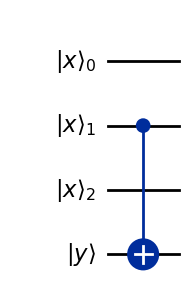

In [26]:
n = 3
x = QuantumRegister(n, name="|x\\rangle")
y = QuantumRegister(1, name="|y\\rangle")
qc = QuantumCircuit(x,y)

qc.compose(bv_oraculo(n), inplace=True)
qc.decompose().draw('mpl')

In [8]:
print(s)

NameError: name 's' is not defined

------------------------
------------------------
------------------------

# Algoritmo de periodicidad de Simon <a name="simon"></a>

En este caso, el oráculo es una función $f_c:\{0,1\}^n \rightarrow \{0,1\}^n$ que depende de un número binario desconocido $c=c_{n-1}c_{n-2}\ldots c_0 \ne 0$, con $c_i \in \{0,1\}$, tal que, para todos los valores $x,y \in \{0,1\}^n$ se tiene que:
$$
f_c(x) = f_c(y) \Leftrightarrow y=x\oplus c \text{   (o que }x\oplus y =c\text{)}
$$

Es decir, los valores de $f_c$ se repiten con un cierto patrón dado por $c$, que se denomina período. Por ejemplo, supongamos $n=3$ y $c=5\equiv 101$:

$$
\hphantom{00} x\hphantom{0 \oplus 1} c \hphantom{01 = 1} y\hphantom{01 \Rightarrow f_c(0) = f_c(5)}\\
000 \oplus 101 = 101 \Rightarrow f_c(0) = f_c(5)\\
001 \oplus 101 = 100 \Rightarrow f_c(1) = f_c(4)\\
010 \oplus 101 = 111 \Rightarrow f_c(2) = f_c(7)\\
011 \oplus 101 = 110 \Rightarrow f_c(3) = f_c(6)\\
100 \oplus 101 = 001 \Rightarrow f_c(4) = f_c(1)\\
101 \oplus 101 = 000 \Rightarrow f_c(5) = f_c(0)\\
110 \oplus 101 = 011 \Rightarrow f_c(6) = f_c(3)\\
111 \oplus 101 = 010 \Rightarrow f_c(7) = f_c(2)
$$

**Solución clásica**

Un algoritmo clásico necesita evaluar la función hasta encontrar dos valores $x$ e $y$ tales que $f_c(x) = f_c(y)$. Dados esos valores, se tiene que $c=x\oplus y$.

En el peor de los casos tenemos que buscar en la mitad de los valores, efectuando $2^{n-1}+1$ evaluaciones de $f(x)$.

**Solución cuántica**

El algoritmo cuántico ([D. R. Simon, 1997](https://doi.org/10.1137/S0097539796298637)) solo necesita $n$ evaluaciones.

El circuito que se utiliza es similar al que venimos usando pero con $n$ bits de ancilla:

<center><img src="https://drive.google.com/uc?export=view&id=1x8fmuY7WjcTh9iIrjY3-Fhp95pT_IbRf" alt="Simon" width="800"  /></center>



Pasos:

<ol>
   <li>
        Estado inicial:
        

$$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 0\rangle^{\otimes n}$$


   </li>
    
<li>Después de aplicar las primeras puertas H:
$$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1}|0\rangle \vert x\rangle$$
</li>
   <p>
<li>Aplicamos $U_f$ a $\vert y\rangle\vert x\rangle$ para obtener $\vert y \oplus f(x)\rangle\vert x\rangle$:
$$
\lvert \psi_2 \rangle  
= \frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1}|0\oplus f(x)\rangle|x\rangle =  
\frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1}|f(x)\rangle|x\rangle
$$
</li>
<p>
<li>Ahora aplicamos una H a cada cúbit en  $|x\rangle$ (recordemos que $H^{\otimes n}|x\rangle = \frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^n-1} (-1)^{x\cdot i}|i\rangle)$<p>
$$
\begin{aligned}
    \lvert \psi_3 \rangle
          = \frac{1}{2^n} \sum_{x=0}^{2^n-1}|f(x)\rangle \sum_{i=0}^{2^n-1}(-1)^{x \cdot i} \vert i \rangle
          = \frac{1}{2^n}\sum_{x=0}^{2^n-1}
            \left[ \sum_{i=0}^{2^n-1}(-1)^{x \cdot i}
            \vert f(x) \rangle \vert i \rangle \right]
\end{aligned}
$$
</li><br>
</ol>

Sabemos que para cada $\vert x \rangle$ y para cada $\vert i \rangle$ se verifica que $\vert f(x) \rangle\vert i \rangle = \vert f(x\oplus c) \rangle\vert i \rangle$. Para un par de este tipo, los sumandos son:

$$
\frac{(-1)^{x \cdot i} + (-1)^{(x\oplus c) \cdot i}}{2^n}\vert f(x) \rangle\vert i \rangle =
\frac{(-1)^{x \cdot i} + (-1)^{(x\cdot i)\oplus (c\cdot i)}}{2^n}\vert f(x)\rangle\vert i\rangle =
\frac{(-1)^{x \cdot i}[1+(-1)^{c \cdot i}]}{2^n}\vert f(x)\rangle\vert i\rangle
$$

Así, si $c \cdot i = 1$ el termino correspondiente a $\vert f(x)\rangle\vert i\rangle$ se anula, y solo quedan los terminos para los que $c \cdot i = 0$.

Repitiendo varias veces la medida, podemos encontrar diferentes valores de $|i\rangle$ y, a partir de esas ecuaciones, obtener $c$.

**Ejemplo**

Supongamos $f:\{0,1\}^3 \rightarrow \{0,1\}^3$ tal que:
$$
f(0) = f(5) = 4\\
f(1) = f(4) = 1\\
f(2) = f(7) = 5\\
f(3) = f(6) = 7
$$

Es fácil comprobar que $f$ cumple los requisitos para aplicar el algoritmo de Simon.

Aplicando los pasos anteriores, en el paso 3 tenemos:

   
       
$$
\lvert \psi_3 \rangle
                 = \frac{1}{8}\sum_{x=0}^{7}
                    \sum_{i=0}^{7}(-1)^{x \cdot i}
                    \vert f(x)\rangle\vert i\rangle =
                    \frac{1}{8}[\\
|f(0)\rangle|0\rangle +  |f(0)\rangle|1\rangle +  |f(0)\rangle|2\rangle +  |f(0)\rangle|3\rangle + \\
|f(0)\rangle|4\rangle +  |f(0)\rangle|5\rangle +  |f(0)\rangle|6\rangle +  |f(0)\rangle|7\rangle +\\[5pt]
|f(1)\rangle|0\rangle -  |f(1)\rangle|1\rangle +  |f(1)\rangle|2\rangle -  |f(1)\rangle|3\rangle + \\
|f(1)\rangle|4\rangle -  |f(1)\rangle|5\rangle +  |f(1)\rangle|6\rangle -  |f(1)\rangle|7\rangle +\\[5pt]
|f(2)\rangle|0\rangle +  |f(2)\rangle|1\rangle -  |f(2)\rangle|2\rangle -  |f(2)\rangle|3\rangle + \\
|f(2)\rangle|4\rangle +  |f(2)\rangle|5\rangle -  |f(2)\rangle|6\rangle -  |f(2)\rangle|7\rangle +\\[5pt]
|f(3)\rangle|0\rangle -  |f(3)\rangle|1\rangle -  |f(3)\rangle|2\rangle +  |f(3)\rangle|3\rangle + \\
|f(3)\rangle|4\rangle -  |f(3)\rangle|5\rangle -  |f(3)\rangle|6\rangle +  |f(3)\rangle|7\rangle +\\[5pt]
|f(4)\rangle|0\rangle +  |f(4)\rangle|1\rangle +  |f(4)\rangle|2\rangle +  |f(4)\rangle|3\rangle - \\
|f(4)\rangle|4\rangle -  |f(4)\rangle|5\rangle -  |f(4)\rangle|6\rangle -  |f(4)\rangle|7\rangle +\\[5pt]
|f(5)\rangle|0\rangle -  |f(5)\rangle|1\rangle +  |f(5)\rangle|2\rangle -  |f(5)\rangle|3\rangle - \\
|f(5)\rangle|4\rangle +  |f(5)\rangle|5\rangle -  |f(5)\rangle|6\rangle +  |f(5)\rangle|7\rangle +\\[5pt]
|f(6)\rangle|0\rangle +  |f(6)\rangle|1\rangle -  |f(6)\rangle|2\rangle -  |f(6)\rangle|3\rangle - \\
|f(6)\rangle|4\rangle -  |f(6)\rangle|5\rangle +  |f(6)\rangle|6\rangle +  |f(6)\rangle|7\rangle +\\[5pt]
|f(7)\rangle|0\rangle -  |f(7)\rangle|1\rangle -  |f(7)\rangle|2\rangle +  |f(7)\rangle|3\rangle - \\
|f(7)\rangle|4\rangle +  |f(7)\rangle|5\rangle +  |f(7)\rangle|6\rangle -  |f(7)\rangle|7\rangle\ ]
$$

Substituyendo los valores de $f$:

$$
\lvert \psi_3 \rangle = \frac{1}{8}[\\
|4\rangle|0\rangle +  |4\rangle|1\rangle +  |4\rangle|2\rangle +  |4\rangle|3\rangle +  
|4\rangle|4\rangle +  |4\rangle|5\rangle +  |4\rangle|6\rangle +  |4\rangle|7\rangle +\\[5pt]
|1\rangle|0\rangle -  |1\rangle|1\rangle +  |1\rangle|2\rangle -  |1\rangle|3\rangle +  
|1\rangle|4\rangle -  |1\rangle|5\rangle +  |1\rangle|6\rangle -  |1\rangle|7\rangle +\\[5pt]
|5\rangle|0\rangle +  |5\rangle|1\rangle -  |5\rangle|2\rangle -  |5\rangle|3\rangle +  
|5\rangle|4\rangle +  |5\rangle|5\rangle -  |5\rangle|6\rangle -  |5\rangle|7\rangle +\\[5pt]
|7\rangle|0\rangle -  |7\rangle|1\rangle -  |7\rangle|2\rangle +  |7\rangle|3\rangle +  
|7\rangle|4\rangle -  |7\rangle|5\rangle -  |7\rangle|6\rangle +  |7\rangle|7\rangle +\\[5pt]
|1\rangle|0\rangle +  |1\rangle|1\rangle +  |1\rangle|2\rangle +  |1\rangle|3\rangle -  
|1\rangle|4\rangle -  |1\rangle|5\rangle -  |1\rangle|6\rangle -  |1\rangle|7\rangle +\\[5pt]
|4\rangle|0\rangle -  |4\rangle|1\rangle +  |4\rangle|2\rangle -  |4\rangle|3\rangle -  
|4\rangle|4\rangle +  |4\rangle|5\rangle -  |4\rangle|6\rangle +  |4\rangle|7\rangle +\\[5pt]
|7\rangle|0\rangle +  |7\rangle|1\rangle -  |7\rangle|2\rangle -  |7\rangle|3\rangle -  
|7\rangle|4\rangle -  |7\rangle|5\rangle +  |7\rangle|6\rangle +  |7\rangle|7\rangle +\\[5pt]
|5\rangle|0\rangle -  |5\rangle|1\rangle -  |5\rangle|2\rangle +  |5\rangle|3\rangle -  
|5\rangle|4\rangle +  |5\rangle|5\rangle +  |5\rangle|6\rangle -  |5\rangle|7\rangle\ ]
$$

Simplificando:
$$
\lvert \psi_3 \rangle = \frac{1}{4}\left[\\
|4\rangle|0\rangle+|1\rangle|0\rangle+|5\rangle|0\rangle+|7\rangle|0\rangle+\\
|4\rangle|2\rangle+|1\rangle|2\rangle-|5\rangle|2\rangle-|7\rangle|2\rangle+\\
|4\rangle|5\rangle-|1\rangle|5\rangle+|5\rangle|5\rangle-|7\rangle|5\rangle+\\
|4\rangle|7\rangle-|1\rangle|7\rangle-|5\rangle|7\rangle+|7\rangle|7\rangle\ \right]
$$

Que podemos escribir como:
$$
\lvert \psi_3 \rangle = \frac{1}{4}\left[\\
(|4\rangle+|1\rangle+|5\rangle+|7\rangle) \otimes|0\rangle+\\
(|4\rangle+|1\rangle-|5\rangle-|7\rangle)\otimes|2\rangle+\\
(|4\rangle-|1\rangle+|5\rangle-|7\rangle)\otimes|5\rangle+\\
(|4\rangle-|1\rangle-|5\rangle+|7\rangle)\otimes|7\rangle\ \right]
$$

Al medir los 3 bits $|x\rangle$ obtenemos, con igual probabilidad, $|000\rangle$, $|010\rangle$, $|101\rangle$ o $|111\rangle$. Para esos valores, su producto bit a bit por $c$ (módulo 2) da 0, por lo que tenemos, si $c=c_2c_1c_0$, con $c_i\in \{0,1\}$, las siguientes ecuaciones:

i. $|000\rangle\cdot c = 0\cdot c_2\oplus 0\cdot c_1 \oplus 0\cdot c_0 = 0$

ii. $|010\rangle\cdot c = 0\cdot c_2\oplus 1\cdot c_1 \oplus 0\cdot c_0 = 0$

iii. $|101\rangle\cdot c = 1\cdot c_2\oplus 0\cdot c_1 \oplus 1\cdot c_0 = 0$

iv. $|111\rangle\cdot c = 1\cdot c_2\oplus 1\cdot c_1 \oplus 1\cdot c_0 = 0$

 la ecuación (ii) indica que $c_1 = 0$, la (iii) que $c_2\oplus c_0 =0$ y la (iv) que $c_2\oplus c_1 \oplus c_0 =0$. Las únicas opciones para $c$ son $000$ o $101$, y como $c\neq 0$, tenemos que $c=5$.

### Ejercicio 6

Usamos el algoritmo de Simon para $n=3$ y obtenemos a la salida los siguientes estados: $|000\rangle$, $|001\rangle$, $|110\rangle$ y $|111\rangle$. ¿Cuánto vale $c$?

### Oráculo para el algoritmo de Simon

Supongamos $n=3$ y $c=110$. Una posible función es la siguiente:

$$
f(000) = f(110) = 000\\
f(001) = f(111) = 001\\
f(010) = f(100) = 100\\
f(011) = f(101) = 101
$$

Esta función se define como sigue. Sea $i$ la posición del bit a 1 menos significativo de $c$ (en el ejemplo, $i=1$). Definimos f como:

$$
f(x) =
\begin{cases}
x \text{, si } x_i = 0\\
x\oplus c \text{, si } x_i = 1
\end{cases}
$$

Para implementar esa función podemos hacer lo siguiente:

1. Copiamos el valor de $|x\rangle$ en los cúbits de ancilla para tener $|x\rangle|x\rangle$.
2. Sea $i$ la posición del bit a 1 menos significativo de $c$. Usamos puertas CNOT con:
   - Cúbit de control: $x_i$
   - Cúbits target: todas las ancillas con $j\ge i$ para las $j$ que verifiquen que $c_j = 1$.
3. Adicionalmente, se pueden permutar e invertir las ancillas para introducir variabilidad.

In [ ]:
# Ejemplo de oráculo para n=3 y c=110
# init es el valor inicial del registro x
def simon_oraculo_simple(init):
    x = QuantumRegister(3, name="|x\\rangle")
    ancilla = QuantumRegister(3, name="|ancilla\\rangle")
    meas = ClassicalRegister(3, name="Medida")
    qc = QuantumCircuit(x, ancilla, meas)
    qc.initialize(init)

    # Hacemos la copia de la x a las ancillas
    qc.cx(x,ancilla)

    qc.barrier()

    qc.cx(x[1],ancilla[1])
    qc.cx(x[1],ancilla[2])

    qc.barrier()

    qc.measure(ancilla, meas)
    return(qc)

In [ ]:
qc = simon_oraculo_simple(0)
qc.draw('mpl')

In [ ]:
# Probamos para diferentes valores
sim = AerSimulator(method='automatic')
for x in range(8):
    qc = simon_oraculo_simple(x)

    # Ejecutamos una simulación y obtenemos los resultados
    qc_obj = transpile(qc, sim)
    salida = sim.run(qc_obj, shots=1).result().get_counts()

    print('f({0:03b}) = {1}'.format(x,list(salida.keys())[0]))

### Ejercicio 7

Programa en Qiskit un oráculo para el algoritmo de Simon que implemente la función:$f:\{0,1\}^3 \rightarrow \{0,1\}^3$ tal que:

$$
f(0) = f(5) = 4\\
f(1) = f(4) = 5\\
f(2) = f(7) = 6\\
f(3) = f(6) = 7
$$

-------------------------------
--------------------------------
---------------------------------